ANA – Mighty Ducks of Anaheim/Anaheim Ducks
BOS – Boston Bruins BUF – Buffalo Sabres
CAR – Carolina Hurricanes
CBJ – Columbus Blue Jackets
CGY – Calgary Flames
CHI – Chicago Black Hawks/Blackhawks
COL – Colorado Avalanche
DAL – Dallas Stars
DET – Detroit Red Wings
EDM – Edmonton Oilers
FLA – Florida Panthers
LAK – Los Angeles Kings
MIN – Minnesota Wild
MTL – Montreal Canadiens
NJD – New Jersey Devils
NSH – Nashville Predators
NYI – New York Islanders
NYR – New York Rangers
OTT – Ottawa Senators
PHI – Philadelphia Flyers
PIT – Pittsburgh Penguins
SEA – Seattle Kraken
SJS – San Jose Sharks
STL – St. Louis Blues
TBL – Tampa Bay Lightning
TOR – Toronto Maple Leafs
UTA – Utah Hockey Club/Utah Mammoth
VAN – Vancouver Canucks
VGK – Vegas Golden Knights
WPG – Winnipeg Jets
WSH – Washington Capitals


enter team name abbreviation:  VAN
beginning of sample:  20
end of sample:  30
alphaShotDiff =  0.33
alphaShotAgainstDiff =  0.45
alphaShootingPct =  0.2
alphaGAPct =  0.2


Boxscore for game 2024020354, 2024-11-27:
Shots for VAN: 29
Average shots against PIT (rolling sample): 32.396380610712896

Boxscore for game 2024020364, 2024-11-29:
Shots for VAN: 22
Average shots against BUF (rolling sample): 28.642214261296584

Boxscore for game 2024020388, 2024-12-01:
Shots for VAN: 32
Average shots against DET (rolling sample): 27.144906491513677

Boxscore for game 2024020402, 2024-12-03:
Shots for VAN: 32
Average shots against MIN (rolling sample): 29.283341428498538

Boxscore for game 2024020422, 2024-12-06:
Shots for VAN: 17
Average shots against CBJ (rolling sample): 26.125756842535843

Boxscore for game 2024020437, 2024-12-08:
Shots for VAN: 25
Average shots against TBL (rolling sample): 25.375001012419048

Boxscore for game 2024020455, 2024-12-10:
Shots for VAN: 25
Average shots against STL (rolling sample): 27.019166323151076

Boxscore for game 2024020471, 2024-12-12:
Shots for VAN: 19
Average shots against FLA (rolling sample): 26.599898769782524

Boxscore

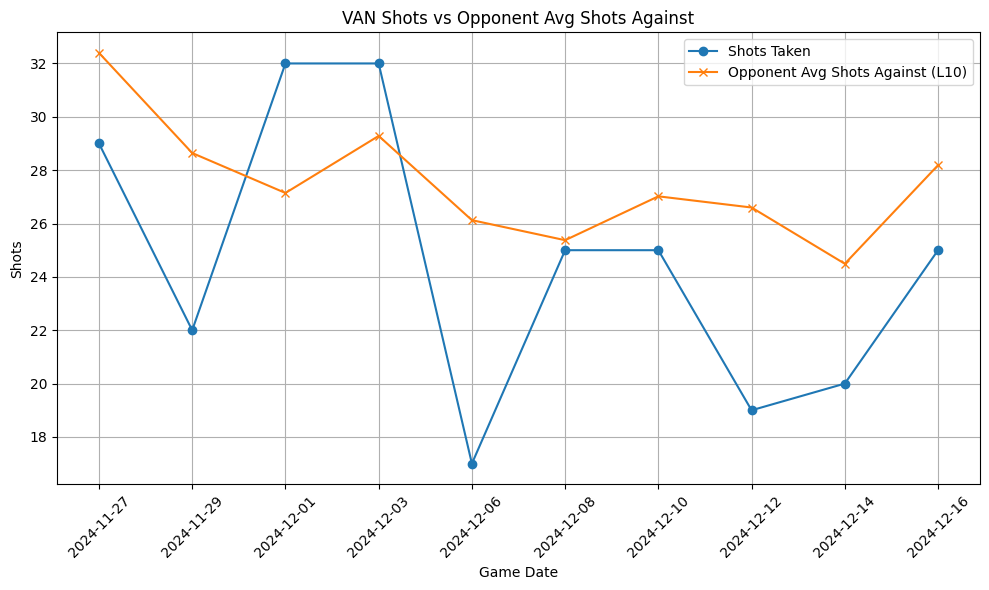

total +/- performance shots performance based on opponents shots against: -3.7437002655511336
Boxscore for game 2024020519, 2024-12-19:
Shots for VAN: 21
Shots for VGK: 20

goals for VAN: 1
saves for VGK: 20
opp avg: 29.694711894140923
away handicap

shots expected will be 25.25101162858979
difference shots: -4.25101162858979
percent error shots: -0.2024291251709424
0.9014485627003286

expected goals will be: 2.4885234892682404
difference goals: -1.4885234892682404

percent error goals: -1.4885234892682404

expected saves will be: 22.76248813932155
expected saves difference will be: -2.762488139321551
percent error saves: -0.13812440696607756


In [2]:
import requests
import time
import matplotlib.pyplot as plt
from enum import Enum

class gameType(Enum):
    preSeason = 1
    RegularSeason = 2
    Playoffs = 3
    

print("ANA – Mighty Ducks of Anaheim/Anaheim Ducks\nBOS – Boston Bruins BUF – Buffalo Sabres\nCAR – Carolina Hurricanes\nCBJ – Columbus Blue Jackets\nCGY – Calgary Flames\nCHI – Chicago Black Hawks/Blackhawks\nCOL – Colorado Avalanche\nDAL – Dallas Stars\nDET – Detroit Red Wings\nEDM – Edmonton Oilers\nFLA – Florida Panthers")
print("LAK – Los Angeles Kings\nMIN – Minnesota Wild\nMTL – Montreal Canadiens\nNJD – New Jersey Devils\nNSH – Nashville Predators\nNYI – New York Islanders\nNYR – New York Rangers\nOTT – Ottawa Senators\nPHI – Philadelphia Flyers\nPIT – Pittsburgh Penguins\nSEA – Seattle Kraken\nSJS – San Jose Sharks\nSTL – St. Louis Blues\nTBL – Tampa Bay Lightning\nTOR – Toronto Maple Leafs\nUTA – Utah Hockey Club/Utah Mammoth\nVAN – Vancouver Canucks\nVGK – Vegas Golden Knights\nWPG – Winnipeg Jets\nWSH – Washington Capitals")

teamname = input("enter team name abbreviation: ")  # team of interest

sampleStart = int(input("beginning of sample: "))
sampleEnd = int(input("end of sample: "))

numGamesInputted = sampleEnd - sampleStart  # sample size (will remove when season is in swing)
alphaShotDiff = float(input("alphaShotDiff = "))  # higher alpha = more emphasis on recent performances shot diff
alphaShotAgainstDiff = float(input ("alphaShotAgainstDiff = ")) #L10
alphaShootingPct = float(input("alphaShootingPct = "))  # shooting percentage
alphaGAPct = float(input ("alphaGAPct = ")) # save percentage
        
teamSchedulesCache = {}

def getSchedule(team):
    if team not in teamSchedulesCache:
        url = f"https://api-web.nhle.com/v1/club-schedule-season/{team}/20242025"
        response = requests.get(url)
        if response.status_code == 200:
            scheduleJson = response.json()
            games = scheduleJson.get("games", [])
            regular_ids = [g["id"] for g in games if g.get("gameType") == gameType.RegularSeason.value]
            teamSchedulesCache[team] = regular_ids
        else:
            teamSchedulesCache[team] = []
    return teamSchedulesCache[team]

def avgShotAgainstL10(opposingTeam, sampleEnd, OpposingTeamSchedule):

    sampleStart = max(0, sampleEnd - 10)
    
    smoothedDifferentialAvgShot = 0

    for gameid in OpposingTeamSchedule[sampleStart:sampleEnd]:
        url = f"https://api-web.nhle.com/v1/gamecenter/{gameid}/boxscore"
        response = requests.get(url)
        if response.status_code == 200:
            boxscore = response.json()

            #grab team names
            homeTeam = boxscore['homeTeam']['abbrev']
            awayTeam = boxscore['awayTeam']['abbrev']

            #grab shots
            shotsAgainstHome = boxscore['awayTeam']['sog']
            shotsAgainstAway = boxscore['homeTeam']['sog']

            if homeTeam == opposingTeam:
                shotsOfInterest = shotsAgainstHome
            else:
                shotsOfInterest = shotsAgainstAway

            thisAvgShot = shotsOfInterest
            smoothedDifferentialAvgShot = alphaShotAgainstDiff * thisAvgShot + (1 - alphaShotAgainstDiff) * smoothedDifferentialAvgShot

        time.sleep(1)

    return smoothedDifferentialAvgShot

def avgSavePercentage(regularSeasonGamesId, OpposingTeamSchedule, teamname, opposingTeam, sampleStart, sampleEnd, alphaShootingPct, alphaGAPct):
    shootingSmoothed = 0
    goalsLetInSmoothed = 0

    for gameid in regularSeasonGamesId[sampleStart:sampleEnd]:
        url = f"https://api-web.nhle.com/v1/gamecenter/{gameid}/boxscore"
        response = requests.get(url)
        if response.status_code == 200:
            boxscore = response.json()

            #grab teamnames and boxscores
            homeTeam = boxscore['homeTeam']['abbrev']
            awayTeam = boxscore['awayTeam']['abbrev']

            if homeTeam == teamname:
                shots = boxscore['homeTeam']['sog']
                goals = boxscore['homeTeam']['score']
            elif awayTeam == teamname:
                shots = boxscore['awayTeam']['sog']
                goals = boxscore['awayTeam']['score']
            else:
                continue

            if shots != 0:
                thisShootingPct = goals / shots
                shootingSmoothed = alphaShootingPct * thisShootingPct + (1 - alphaShootingPct) * shootingSmoothed
       
        time.sleep(1)

    for gameid in OpposingTeamSchedule[sampleStart:sampleEnd]:
        urlOpp = f"https://api-web.nhle.com/v1/gamecenter/{gameid}/boxscore"
        responseOpp = requests.get(urlOpp)
        if responseOpp.status_code == 200:
            boxscoreOpp = responseOpp.json()

            #grab teamnames and boxscores
            boxscoreOpp = responseOpp.json()

            homeTeam = boxscoreOpp['homeTeam']['abbrev']
            awayTeam = boxscoreOpp['awayTeam']['abbrev']
            
            if homeTeam == opposingTeam:
                shotsAgainst = boxscoreOpp['awayTeam']['sog']
                goalsAgainst = boxscoreOpp['awayTeam']['score']
            elif awayTeam == opposingTeam:
                shotsAgainst = boxscoreOpp['homeTeam']['sog']
                goalsAgainst = boxscoreOpp['homeTeam']['score']

            else:
                continue

            if shotsAgainst != 0:
                GApercent = goalsAgainst / shotsAgainst
                goalsLetInSmoothed = alphaGAPct * GApercent + (1 - alphaGAPct) * goalsLetInSmoothed
       
        time.sleep(1)

    return 0.25 * (1 - shootingSmoothed) + 0.75 * (1 - goalsLetInSmoothed) #smoothing so that Save Percentage has 3 times more contributions than shooting percentage

def shotDifferential(regularSeasonGamesId, numGamesInputted, teamname, sampleStart, sampleEnd):

    #plotting variables
    shotsThisGameList = []
    avgShotsAgainstList = []
    gameDates = []

    smoothedDifferential = 0

    for i in range(sampleStart, sampleEnd):
        
        gameid = regularSeasonGamesId[i]

        url = f"https://api-web.nhle.com/v1/gamecenter/{gameid}/boxscore"  # fetch boxscores
        response = requests.get(url)
        if response.status_code == 200:
            boxscore = response.json()

            #retrieve teamname and boxscores
            homeTeam = boxscore['homeTeam']['abbrev']
            awayTeam = boxscore['awayTeam']['abbrev']

            shotsAgainstHome = boxscore['awayTeam']['sog'] 
            shotsAgainstAway = boxscore['homeTeam']['sog']  

            if homeTeam == teamname:
                opponentTeam = awayTeam
                currentTeam = homeTeam
                shotsOfInterest = shotsAgainstAway
            else:
                opponentTeam = homeTeam
                currentTeam = awayTeam
                shotsOfInterest = shotsAgainstHome

            opponentSchedule = getSchedule(opponentTeam)
            if not opponentSchedule:
                continue
            
            avgShotAgainst = avgShotAgainstL10(opponentTeam, i, opponentSchedule)
            thisDiff = shotsOfInterest - avgShotAgainst
            smoothedDifferential = alphaShotDiff * thisDiff + (1 - alphaShotDiff) * smoothedDifferential
            
            shotsThisGameList.append(shotsOfInterest)
            avgShotsAgainstList.append(avgShotAgainst)
            gameDates.append(boxscore['gameDate'])

            print(f"Boxscore for game {gameid}, {boxscore['gameDate']}:")
            print(f"Shots for {currentTeam}: {shotsOfInterest}")
            print(f"Average shots against {opponentTeam} (rolling sample): {avgShotAgainst}\n")
        else:
            print(f"Failed to fetch boxscore for game {gameid}, status code {response.status_code}")

        time.sleep(1)

    return smoothedDifferential, shotsThisGameList, avgShotsAgainstList, gameDates

regularSeasonGamesId = getSchedule(teamname)

avgDiff, shotsThisGameList, avgShotsAgainstList, gameDates = shotDifferential(
    regularSeasonGamesId, numGamesInputted, teamname, sampleStart, sampleEnd)


# Fetch last game boxscore first to get opposingTeam before fetching their schedule (just double checking accuracy)
url = f"https://api-web.nhle.com/v1/gamecenter/{regularSeasonGamesId[sampleEnd + 1]}/boxscore"
response1 = requests.get(url)

if response1.status_code == 200:
    boxscoreLastGame = response1.json()

    #grabbing team names
    homeTeam = boxscoreLastGame['homeTeam']['abbrev']
    awayTeam = boxscoreLastGame['awayTeam']['abbrev']

    #determing opposingTeam so schedule can be pulled
    if homeTeam == teamname:
        opposingTeam = awayTeam
    else:
        opposingTeam = homeTeam

    #grab neccasary box score info
    shotsAgainstHome = boxscoreLastGame['homeTeam']['sog']
    shotsAgainstAway = boxscoreLastGame['awayTeam']['sog']

    goalsAgainstHome = boxscoreLastGame['awayTeam']['score']
    goalsAgainstAway = boxscoreLastGame['homeTeam']['score']
    
    OpposingTeamSchedule = getSchedule(opposingTeam)

# plot
plt.figure(figsize=(10, 6))
plt.plot(gameDates, shotsThisGameList, label='Shots Taken', marker='o')
plt.plot(gameDates, avgShotsAgainstList, label='Opponent Avg Shots Against (L10)', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Game Date')
plt.ylabel('Shots')
plt.title(f"{teamname} Shots vs Opponent Avg Shots Against")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


print(f"total +/- performance shots performance based on opponents shots against: {avgDiff}")


print(f"Boxscore for game {regularSeasonGamesId[sampleEnd + 1]}, {boxscoreLastGame['gameDate']}:")
print(f"Shots for {awayTeam}: {shotsAgainstHome}")
print(f"Shots for {homeTeam}: {shotsAgainstAway}")

if homeTeam == teamname:
    
    shotsOfInterest2 = shotsAgainstAway
    goalsOfInterest2 = goalsAgainstAway
    opposingTeam2 = awayTeam
else:
    shotsOfInterest2 = shotsAgainstHome
    goalsOfInterest2 = goalsAgainstHome
    opposingTeam2 = homeTeam

saves_of_interest = shotsOfInterest2 - goalsOfInterest2

print(f"\ngoals for {teamname}: {goalsOfInterest2}")
print(f"saves for {opposingTeam2}: {saves_of_interest}")



opponent_recent_avg = avgShotAgainstL10(opposingTeam, sampleEnd, OpposingTeamSchedule)
print(f"opp avg: {opponent_recent_avg}")
Xshot = opponent_recent_avg + avgDiff

if opposingTeam == homeTeam:
    Xshot -= 0.7
    print("away handicap")

print(f"\nshots expected will be {Xshot}")
print(f"difference shots: {shotsOfInterest2 - Xshot}")
print(f"percent error shots: {(shotsOfInterest2 - Xshot) / shotsOfInterest2}")


XSvsPercent = avgSavePercentage(regularSeasonGamesId, OpposingTeamSchedule, teamname, opposingTeam, sampleStart, sampleEnd, alphaShootingPct, alphaGAPct)

print(f"Save %: {XSvsPercent})

Xgoal = (1 - XSvsPercent) * Xshot
Xsaves = Xshot - Xgoal

print(f"\nexpected goals will be: {Xgoal}")
print(f"difference goals: {goalsOfInterest2 - Xgoal}\n")
print(f"percent error goals: {(goalsOfInterest2 - Xgoal) / goalsOfInterest2}")

print(f"\nexpected saves will be: {Xsaves}")
print(f"expected saves difference will be: {saves_of_interest - Xsaves}")
print(f"percent error saves: {(saves_of_interest - Xsaves) / saves_of_interest}")
